In [ ]:
import matplotlib.pyplot as plt
import glob
from PIL import Image
import transformers
import os
import warnings
warnings.filterwarnings("ignore")

## Load image dataset for computer vision

In [ ]:
DIR = "../data/IMG_VALID" # Directory containing images

# Load images paths using glob
def load_image_paths(img_dir=DIR, num_images=None):
    image_paths = glob.glob(os.path.join(img_dir, "*.jpg"))
    print(f"Total Images: {len(image_paths)}")
    return image_paths[:num_images]

load_image_paths()

Total Images: 947


['../data/IMG_VALID/111_20220211T041351392Z_s00.mp4_2400.jpg',
 '../data/IMG_VALID/10_20220315T010303302Z_s00.mp4_44600.jpg',
 '../data/IMG_VALID/111_20220422T014816656Z_s00.mp4_14300.jpg',
 '../data/IMG_VALID/104_20220321T021706325Z_s00.mp4_2000.jpg',
 '../data/IMG_VALID/12_20220527T120309238Z_s00.mp4_1100.jpg',
 '../data/IMG_VALID/119_20220322T120533980Z_s00.mp4_36300.jpg',
 '../data/IMG_VALID/114_20220616T122504219Z_s00.mp4___750.jpg',
 '../data/IMG_VALID/104_20220506T124337874Z_s00.mp4_122600.jpg',
 '../data/IMG_VALID/122_20220425T120526983Z_s00.mp4_91000.jpg',
 '../data/IMG_VALID/13_20210802T102721443Z_s00frame632599236716.jpg',
 '../data/IMG_VALID/122_20220323T010604729Z_s00.mp4_62500.jpg',
 '../data/IMG_VALID/101_20220321T021439555Z_s00.mp4_900.jpg',
 '../data/IMG_VALID/123_20220503T061702133Z_s00.mp4___450.jpg',
 '../data/IMG_VALID/122_20220503T061600595Z_s00.mp4___500.jpg',
 '../data/IMG_VALID/120_20220322T011638792Z_s00.mp4_11900.jpg',
 '../data/IMG_VALID/131_20220504T1203192

## Visualization + YOLO Label Overlay

In [ ]:
import os
import math
import matplotlib.pyplot as plt
from PIL import Image


def visualize_yolo_grid(image_paths, labels_dir, cols=4, figsize=(16, 10)):

    total_images = len(image_paths)
    rows = math.ceil(total_images / cols)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    # Consistency in figure size
    axes = axes.flatten()

    for idx, img_path in enumerate(image_paths):

        # ======================
        # LOAD IMAGE
        # ======================

        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        ax = axes[idx]
        ax.imshow(img)
        ax.axis("off")

        # ======================
        # LOAD LABEL
        # ======================

        label_file = os.path.join(
            labels_dir,
            os.path.basename(img_path).replace(".jpg", ".txt")
        )

        if os.path.exists(label_file):
            with open(label_file) as f:
                for line in f:
                    class_id, x_center, y_center, box_weight, box_height = map(float, line.split())

                    # Convert YOLO format to pixel values
                    x_center *= w
                    y_center *= h
                    box_weight *= w
                    box_height *= h

                    x_min = x_center - box_weight / 2
                    y_min = y_center - box_height / 2

                    rect = plt.Rectangle(
                        (x_min, y_min),
                        box_weight,
                        box_height,
                        fill=False,
                        linewidth=2
                    )
                    ax.add_patch(rect)

                    # Lable text
                    ax.text(
                        x_min,
                        y_min - 5,
                        f"ID: {int(class_id)}",
                        fontsize=10,
                        color="white",
                        bbox=dict(facecolor='black', alpha=0.6)
                    )

        # ======================
        # TITLE (FILENAME)
        # ======================

        filename = os.path.basename(img_path)
        ax.set_title(filename[:25], fontsize=12)

    # ======================
    # HIDE EMPTY SUBPLOTS
    # ======================

    for i in range(total_images, len(axes)):
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

Total Images: 947


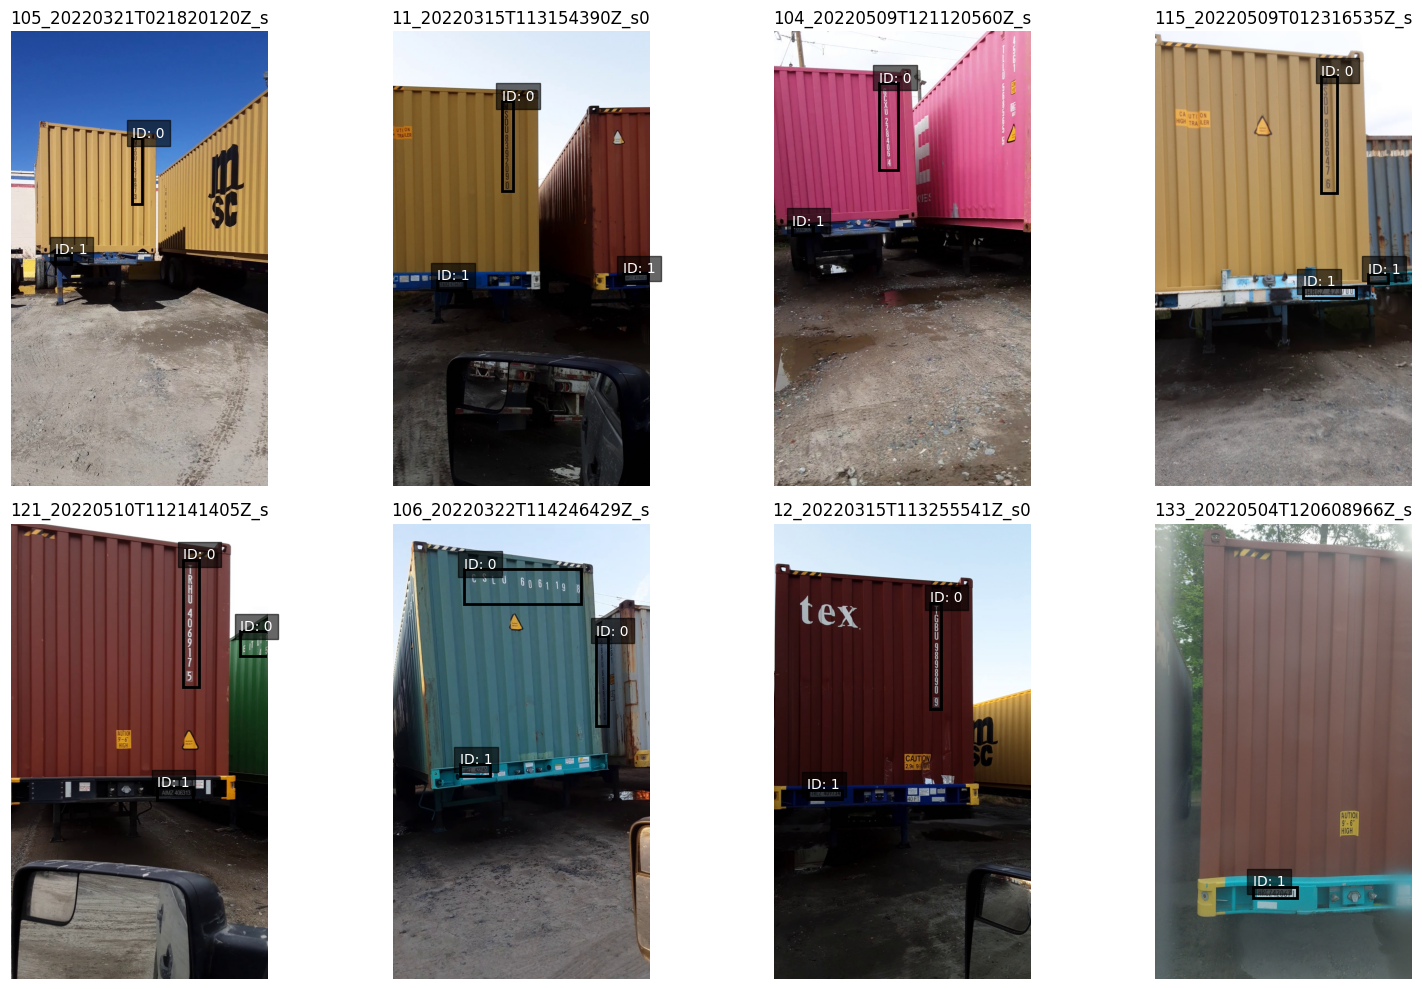

In [ ]:
image_path = load_image_paths()[-8:]
visualize_yolo_grid(image_paths=image_path, labels_dir=DIR, cols=4)